In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df = df.rename(columns={'RegionName': 'zipcode'})

In [5]:
df['zipcode'] = df['zipcode'].astype(str).str.zfill(5)

In [6]:
df['five_year'] = ((df['2018-04']/df['2013-04'])-1)*100

In [7]:
df.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,26.082701
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,53.384175
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,28.315830
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,25.878840
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,7.048458


In [8]:
df[['zipcode','City','State','five_year']].sort_values(by=['five_year'],ascending=False).head(20)

,zipcode,City,State,five_year
7302,80216,Denver,CO,173.872951
1477,94601,Oakland,CA,167.943262
5830,48240,Redford,MI,161.224490
1239,94590,Vallejo,CA,159.379310
2661,33705,Saint Petersburg,FL,159.210526
6105,37210,Nashville,TN,155.932203
2627,33460,Lake Worth,FL,153.647059
6563,15201,Pittsburgh,PA,147.593583
475,11216,New York,NY,147.591761
1835,37207,Nashville,TN,146.683047


In [9]:
lake_worth = df.loc[df['zipcode'] == '94590']

In [10]:
lake_worth.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
1239,97795,94590,Vallejo,CA,Vallejo,Solano,1240,108200.0,107800.0,107500.0,...,339600,343500,346700,351200,357100,362500,366900,371600,376100,159.37931


In [11]:
lake_worth = lake_worth.iloc[:,7:-1]

In [12]:
lake_worth.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1239,108200.0,107800.0,107500.0,107300.0,107100.0,106900.0,106800.0,106500.0,106400.0,106300.0,...,335100,339600,343500,346700,351200,357100,362500,366900,371600,376100


In [13]:
lake_worth = lake_worth.T

In [14]:
lake_worth.head()

,1239
1996-04,108200.0
1996-05,107800.0
1996-06,107500.0
1996-07,107300.0
1996-08,107100.0


In [15]:
type(lake_worth)

pandas.core.frame.DataFrame

In [16]:
lake_worth = lake_worth.rename(columns={1239:'home price'})

In [17]:
lake_worth.head()

,home price
1996-04,108200.0
1996-05,107800.0
1996-06,107500.0
1996-07,107300.0
1996-08,107100.0


In [18]:
lake_worth.index = lake_worth.index.astype('datetime64[ns]')

In [19]:
lake_worth.index.dtype

dtype('<M8[ns]')

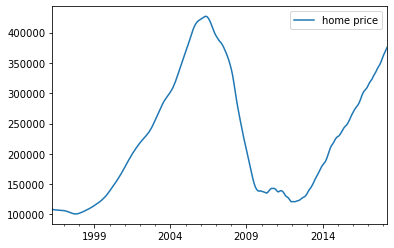

In [20]:
lake_worth.plot();

In [21]:
lake_worth['diff'] = lake_worth.diff()

In [22]:
lake_worth.head()

,home price,diff
1996-04-01,108200.0,NaN
1996-05-01,107800.0,-400.0
1996-06-01,107500.0,-300.0
1996-07-01,107300.0,-200.0
1996-08-01,107100.0,-200.0


In [23]:
lake_worth['home price shifted'] = lake_worth['home price'].shift()

In [24]:
lake_worth.tail()

,home price,diff,home price shifted
2017-12-01,357100.0,5900.0,351200.0
2018-01-01,362500.0,5400.0,357100.0
2018-02-01,366900.0,4400.0,362500.0
2018-03-01,371600.0,4700.0,366900.0
2018-04-01,376100.0,4500.0,371600.0


In [25]:
lake_worth['pct'] = lake_worth['diff']/lake_worth['home price shifted']

In [26]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-04-01,108200.0,NaN,NaN,NaN
1996-05-01,107800.0,-400.0,108200.0,-0.003697
1996-06-01,107500.0,-300.0,107800.0,-0.002783
1996-07-01,107300.0,-200.0,107500.0,-0.001860
1996-08-01,107100.0,-200.0,107300.0,-0.001864


In [27]:
lake_worth['5 year shift'] = lake_worth['home price'].shift(60)

In [28]:
lake_worth.head(61)

,home price,diff,home price shifted,pct,5 year shift
1996-04-01,108200.0,NaN,NaN,NaN,NaN
1996-05-01,107800.0,-400.0,108200.0,-0.003697,NaN
1996-06-01,107500.0,-300.0,107800.0,-0.002783,NaN
1996-07-01,107300.0,-200.0,107500.0,-0.001860,NaN
1996-08-01,107100.0,-200.0,107300.0,-0.001864,NaN
...,...,...,...,...,...
2000-12-01,173900.0,3800.0,170100.0,0.022340,NaN
2001-01-01,177800.0,3900.0,173900.0,0.022427,NaN
2001-02-01,181600.0,3800.0,177800.0,0.021372,NaN
2001-03-01,185400.0,3800.0,181600.0,0.020925,NaN


In [29]:
lake_worth['5 year return'] = ((lake_worth['home price']/lake_worth['5 year shift'])-1)*100

In [30]:
lake_worth.tail()

,home price,diff,home price shifted,pct,5 year shift,5 year return
2017-12-01,357100.0,5900.0,351200.0,0.016800,131800.0,170.940819
2018-01-01,362500.0,5400.0,357100.0,0.015122,135100.0,168.319763
2018-02-01,366900.0,4400.0,362500.0,0.012138,139000.0,163.956835
2018-03-01,371600.0,4700.0,366900.0,0.012810,142100.0,161.505982
2018-04-01,376100.0,4500.0,371600.0,0.012110,145000.0,159.379310


In [31]:
lake_worth.head()

,home price,diff,home price shifted,pct,5 year shift,5 year return
1996-04-01,108200.0,NaN,NaN,NaN,NaN,NaN
1996-05-01,107800.0,-400.0,108200.0,-0.003697,NaN,NaN
1996-06-01,107500.0,-300.0,107800.0,-0.002783,NaN,NaN
1996-07-01,107300.0,-200.0,107500.0,-0.001860,NaN,NaN
1996-08-01,107100.0,-200.0,107300.0,-0.001864,NaN,NaN


In [32]:
lw_dvar = lake_worth.dropna()

In [33]:
df_mean = pd.read_csv('../data/national.csv')

In [34]:
df_mean.head()

,Unnamed: 0,0
0,five-year 2001-04,35.180540
1,five-year 2001-05,35.760117
2,five-year 2001-06,36.308179
3,five-year 2001-07,36.831948
4,five-year 2001-08,37.328660


In [35]:
df_mean.iloc[:,1].values

array([ 35.18053985,  35.76011692,  36.30817887,  36.83194827,
        37.32865988,  37.8069953 ,  38.27221538,  38.73249943,
        39.111278  ,  39.4460225 ,  39.83724063,  40.30037615,
        40.72237946,  41.09422992,  41.43360942,  41.74907935,
        42.04327701,  42.33381627,  42.59648697,  42.99951262,
        43.39240939,  43.57326369,  43.62538032,  43.80738873,
        44.01288126,  44.2614003 ,  44.57818087,  44.96467443,
        45.38097162,  45.81328425,  46.21790364,  46.55667771,
        46.75474477,  46.89544351,  47.13687621,  47.55439538,
        48.08249299,  48.73351988,  49.51166504,  50.37375685,
        51.24110653,  52.09484394,  52.88972001,  53.56845997,
        54.0826896 ,  54.45101928,  54.77126623,  55.19703608,
        55.72187368,  56.2947537 ,  56.91857375,  57.56652767,
        58.15227369,  58.64489454,  58.99356943,  59.1596511 ,
        59.11005283,  58.88426206,  58.55733692,  58.27644121,
        58.01882505,  57.71987763,  57.34617398,  56.88

In [36]:
lw_dvar['mar'] = df_mean.iloc[:,1].values

<ipython-input-36-27c190f2f8ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_dvar['mar'] = df_mean.iloc[:,1].values


In [37]:
lw_dvar.tail()

,home price,diff,home price shifted,pct,5 year shift,5 year return,mar
2017-12-01,357100.0,5900.0,351200.0,0.016800,131800.0,170.940819,33.981388
2018-01-01,362500.0,5400.0,357100.0,0.015122,135100.0,168.319763,34.146081
2018-02-01,366900.0,4400.0,362500.0,0.012138,139000.0,163.956835,34.381704
2018-03-01,371600.0,4700.0,366900.0,0.012810,142100.0,161.505982,34.759700
2018-04-01,376100.0,4500.0,371600.0,0.012110,145000.0,159.379310,34.753288


In [38]:
lw_dvar['5 year minus mar'] = lw_dvar['5 year return'] - lw_dvar['mar']

<ipython-input-38-0dfe89c527e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_dvar['5 year minus mar'] = lw_dvar['5 year return'] - lw_dvar['mar']


In [39]:
lw_dvar.head()

,home price,diff,home price shifted,pct,5 year shift,5 year return,mar,5 year minus mar
2001-04-01,189200.0,3800.0,185400.0,0.020496,108200.0,74.861368,35.180540,39.680828
2001-05-01,192800.0,3600.0,189200.0,0.019027,107800.0,78.849722,35.760117,43.089605
2001-06-01,196400.0,3600.0,192800.0,0.018672,107500.0,82.697674,36.308179,46.389496
2001-07-01,199900.0,3500.0,196400.0,0.017821,107300.0,86.300093,36.831948,49.468145
2001-08-01,203200.0,3300.0,199900.0,0.016508,107100.0,89.729225,37.328660,52.400565


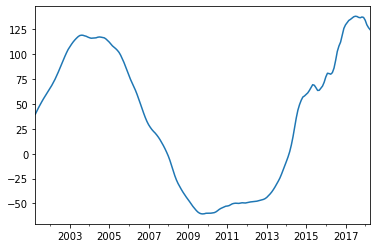

In [40]:
lw_dvar['5 year minus mar'].plot();

In [41]:
lw_down = lw_dvar.loc[lw_dvar['5 year minus mar'] < 0]

In [42]:
lw_down['neg sq'] = lw_down['5 year minus mar']**2

<ipython-input-42-0c89c2b59d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_down['neg sq'] = lw_down['5 year minus mar']**2


In [43]:
lw_down.head(60)

,home price,diff,home price shifted,pct,5 year shift,5 year return,mar,5 year minus mar,neg sq
2008-01-01,340000.0,-7800.0,347800.0,-0.022427,255500.0,33.072407,35.369197,-2.296790,5.275242
2008-02-01,330200.0,-9800.0,340000.0,-0.028824,260100.0,26.951173,33.676758,-6.725586,45.233501
2008-03-01,317800.0,-12400.0,330200.0,-0.037553,264700.0,20.060446,31.944485,-11.884039,141.230390
2008-04-01,304100.0,-13700.0,317800.0,-0.043109,269300.0,12.922391,30.171536,-17.249144,297.532984
2008-05-01,290800.0,-13300.0,304100.0,-0.043736,274000.0,6.131387,28.304691,-22.173304,491.655423
2008-06-01,278100.0,-12700.0,290800.0,-0.043673,278600.0,-0.179469,26.323177,-26.502646,702.390225
2008-07-01,266700.0,-11400.0,278100.0,-0.040992,282900.0,-5.726405,24.351892,-30.078297,904.703945
2008-08-01,256000.0,-10700.0,266700.0,-0.040120,286700.0,-10.708057,22.439946,-33.148004,1098.790144
2008-09-01,245300.0,-10700.0,256000.0,-0.041797,290000.0,-15.413793,20.616128,-36.029921,1298.155180
2008-10-01,234700.0,-10600.0,245300.0,-0.043212,293000.0,-19.897611,18.870624,-38.768235,1502.976059


In [44]:
lw_down.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74 entries, 2008-01-01 to 2014-02-01
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   home price          74 non-null     float64
 1   diff                74 non-null     float64
 2   home price shifted  74 non-null     float64
 3   pct                 74 non-null     float64
 4   5 year shift        74 non-null     float64
 5   5 year return       74 non-null     float64
 6   mar                 74 non-null     float64
 7   5 year minus mar    74 non-null     float64
 8   neg sq              74 non-null     float64
dtypes: float64(9)
memory usage: 5.8 KB


In [45]:
import numpy as np

np.sqrt(lw_down['neg sq'].sum()/lw_dvar['mar'].count())

27.678102622623772

In [46]:
lw_var = lake_worth['5 year return'].dropna()

In [47]:
lw_var.std()

89.22884887716472

In [48]:
lw_var.mean()

58.86702335165098

In [49]:
lw_var.describe()

count    205.000000
mean      58.867023
std       89.228849
min      -69.551041
25%      -40.944882
50%       77.344812
75%      148.170129
max      171.196911
Name: 5 year return, dtype: float64

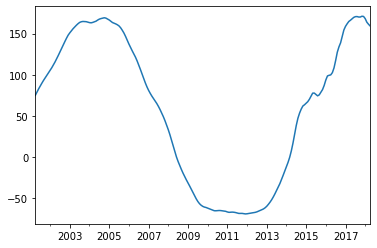

In [50]:
lw_var.plot();

In [51]:
lake_worth = lake_worth.dropna()

In [52]:
lake_worth.head()

,home price,diff,home price shifted,pct,5 year shift,5 year return
2001-04-01,189200.0,3800.0,185400.0,0.020496,108200.0,74.861368
2001-05-01,192800.0,3600.0,189200.0,0.019027,107800.0,78.849722
2001-06-01,196400.0,3600.0,192800.0,0.018672,107500.0,82.697674
2001-07-01,199900.0,3500.0,196400.0,0.017821,107300.0,86.300093
2001-08-01,203200.0,3300.0,199900.0,0.016508,107100.0,89.729225


In [53]:
lake_worth_pct = lake_worth.drop(['home price','diff','home price shifted'],axis=1)

In [54]:
lake_worth_pct.head()

,pct,5 year shift,5 year return
2001-04-01,0.020496,108200.0,74.861368
2001-05-01,0.019027,107800.0,78.849722
2001-06-01,0.018672,107500.0,82.697674
2001-07-01,0.017821,107300.0,86.300093
2001-08-01,0.016508,107100.0,89.729225


In [55]:
lake_worth_pct = lake_worth_pct['2013-04':]

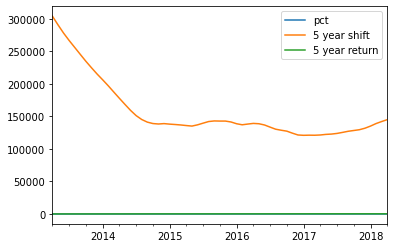

In [56]:
lake_worth_pct.plot();

In [57]:
from statsmodels.tsa.stattools import adfuller

In [58]:
adfuller(lake_worth_pct)

ValueError: x is required to have ndim 1 but has ndim 2

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
cutoff = '2017-05'
train = lake_worth_pct[:cutoff]
test = lake_worth_pct[cutoff:]

In [ ]:
#Plot_acf is used to identify the q parameter
plot_acf(train);

In [ ]:
plot_pacf(train,method='ywm')

In [ ]:
ar_1 = ARIMA(train, order=(1, 0, 1)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
train_pred = ar_1.predict()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(train, train_pred))

In [ ]:
ar_1.summary()

In [ ]:
y_pred = ar_1.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ar_1.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train, color = "black",label='Train')
plt.plot(test, color = "red",label='Test')
plt.ylabel('Monthly % Return')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Home Price Monthly Return Data")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend();